<a href="https://colab.research.google.com/github/jigneshraiyani/DeepLearning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [6]:
df_mpg = pd.read_csv("/content/sample_data/mpg.csv")
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
df_mpg = df_mpg.drop("name", axis=1)


In [8]:
df_mpg['origin'] = df_mpg['origin'].replace({1:'America', 2:'Europe', 3:'Asia'})
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [9]:
df_mpg = pd.get_dummies(df_mpg, columns =['origin'],  drop_first = True )

In [10]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [11]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_Asia    398 non-null    uint8  
 8   origin_Europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [12]:
df_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [13]:
df_mpg['horsepower'] = df_mpg['horsepower'].replace({'?':np.nan})

In [14]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     392 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_Asia    398 non-null    uint8  
 8   origin_Europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [15]:
df_mpg = df_mpg.apply(lambda x: x.fillna( x.median()), axis = 0)

In [16]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_Asia    398 non-null    uint8  
 8   origin_Europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [17]:
df_mpg['horsepower'] = pd.to_numeric(df_mpg['horsepower'])
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_Asia    398 non-null    uint8  
 8   origin_Europe  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


In [18]:
x_df= df_mpg.drop('mpg', axis = 1)
y_df = df_mpg['mpg']
x_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_Asia,origin_Europe
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,0
394,4,97.0,52.0,2130,24.6,82,0,1
395,4,135.0,84.0,2295,11.6,82,0,0
396,4,120.0,79.0,2625,18.6,82,0,0


In [19]:
y_df

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(x_df)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=.2, random_state=21)


In [22]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [23]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [24]:
#Linear Regression

linear_regression = LinearRegression()
linear_regression.fit(x_train_df, y_train_df)

for idx, column_name in enumerate(x_train_df.columns):
  print(" coefficient for column {} id is {} ".format(column_name, linear_regression.coef_[0][idx]))

 coefficient for column cylinders id is -0.28628936866049276 
 coefficient for column displacement id is 0.024050691226266883 
 coefficient for column horsepower id is -0.009067620207200856 
 coefficient for column weight id is -0.007203693404122862 
 coefficient for column acceleration id is 0.12256974778665952 
 coefficient for column model_year id is 0.8321047188474748 
 coefficient for column origin_Asia id is 2.6043179751539385 
 coefficient for column origin_Europe id is 3.217027253190477 


In [25]:
linear_regression.intercept_

array([-23.3545328])

In [26]:
linear_regression.coef_

array([[-0.28628937,  0.02405069, -0.00906762, -0.00720369,  0.12256975,
         0.83210472,  2.60431798,  3.21702725]])

In [27]:
# Ridge Regularization
ridge = Ridge(alpha= .3)
ridge.fit(x_train, y_train)

Ridge(alpha=0.3)

In [28]:
ridge.coef_

array([-0.28364954,  0.02379866, -0.00884552, -0.00720332,  0.12229031,
        0.83174057,  2.56397258,  3.17149684])

In [29]:
# Lasso Regularization
lasso = Lasso(alpha = .3)
lasso.fit(x_train, y_train)
lasso.coef_

array([-0.        ,  0.00356313, -0.00100515, -0.00685333,  0.01292522,
        0.78024206,  0.        ,  0.        ])

In [32]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.8006712843181917
0.8327154468317584


In [33]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8191342292395314
0.8364775077978024


In [34]:

print(linear_regression.score(x_train, y_train))
print(linear_regression.score(x_test, y_test))

0.8191380361464696
0.8363595586097948


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions


In [39]:
from sklearn.datasets import make_moons

In [57]:
x_df, y_df = make_moons(500, noise=.2, random_state=5)
x_df

array([[-1.00071815e+00,  2.75273668e-01],
       [ 1.85800051e+00, -1.38817669e-02],
       [ 5.85816080e-01,  8.53313385e-01],
       [-7.01104014e-01,  4.65499580e-01],
       [ 1.93306437e+00,  1.61073490e-01],
       [ 1.67722331e-01, -3.32626695e-02],
       [ 1.96848003e+00,  4.12740411e-01],
       [-3.70911806e-01,  3.21517145e-01],
       [ 5.56256034e-01,  4.67389248e-01],
       [-8.71076318e-01,  5.63712688e-01],
       [ 8.65153721e-01,  8.80271065e-01],
       [ 6.05118192e-01, -2.98902117e-01],
       [ 2.02719115e+00,  7.70799032e-02],
       [-9.40286423e-01, -4.54430976e-01],
       [-1.17778553e+00,  4.53921133e-01],
       [ 2.40525206e-01,  1.39389123e-01],
       [-3.32301698e-01,  6.88877518e-01],
       [-1.12120034e-01,  1.07696150e+00],
       [-9.13311415e-01,  5.09725940e-01],
       [ 5.15733910e-01, -2.09769215e-01],
       [ 6.67390132e-02,  8.90802382e-02],
       [-4.39586195e-01,  8.33789087e-01],
       [ 3.85688593e-01, -1.20459337e-01],
       [ 6.

In [58]:
y_df

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

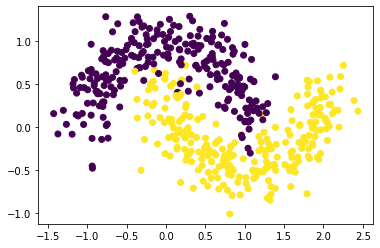

In [59]:
plt.scatter(x_df[:,0], x_df[:,1], c=y_df)
plt.show()

In [64]:
sq_model = Sequential()
sq_model.add(Dense(128, activation='relu', input_dim=2))
sq_model.add(Dense(128, activation='relu', input_dim=2))
sq_model.add(Dense(1, activation='sigmoid'))
sq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras.optimizers import Optimizer
adam1 = Adam(learning_rate=0.01)
sq_model.compile(loss='binary_crossentropy', optimizer= adam1, metrics=['accuracy'])
history = sq_model.fit(x_df, y_df, epochs=200, validation_split=0.2, verbose=0)

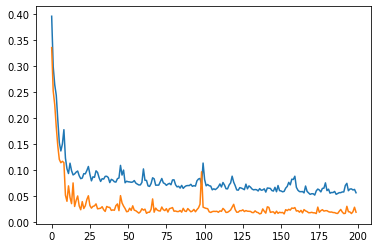

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [67]:
# Sequential Model with Regularization
sq_model1 = Sequential()
sq_model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer= tf.keras.regularizers.l2(.01)))
sq_model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer= tf.keras.regularizers.l2(.01)))
sq_model1.add(Dense(1, activation='sigmoid'))
sq_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               384       
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [68]:
adam1 = Adam(learning_rate=0.01)
sq_model1.compile(loss='binary_crossentropy', optimizer= adam1, metrics=['accuracy'])
history1 = sq_model1.fit(x_df, y_df, epochs=200, validation_split=0.2, verbose=0)

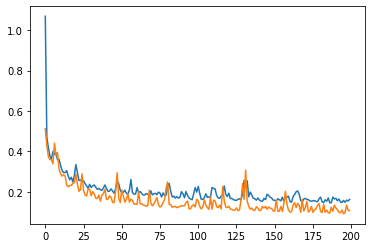

In [69]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])